# Mushroom Clasification
- - - 
[Mushroom 1](https://www.kaggle.com/code/raghuchaudhary/mushroom-classification/notebook#Poisonous-=-1)

[Mushroom 2](https://github.com/kanchitank/Mushroom-Classification/blob/master/mushroom2.ipynb)

__Descripcion:__

+ Attribute Information: (classes: edible=e, poisonous=p)

+ cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

+ cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

+ cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

+ bruises: bruises=t,no=f

+ odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

+ gill-attachment: attached=a,descending=d,free=f,notched=n

+ gill-spacing: close=c,crowded=w,distant=d

+ gill-size: broad=b,narrow=n

+ gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

+ stalk-shape: enlarging=e,tapering=t

+ stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

+ stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

+ stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

+ stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

+ stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

+ veil-type: partial=p,universal=u

+ veil-color: brown=n,orange=o,white=w,yellow=y

+ ring-number: none=n,one=o,two=t

+ ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

+ spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

+ population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

+ habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d*

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mushroom = pd.read_csv('mushrooms.csv')
mushroom.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## EDA 
- - -

In [4]:
mushroom.shape

(8124, 23)

In [5]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Transforaremos los datos a tidpo __`category`__

In [6]:
mushroom = mushroom.astype('category')
mushroom.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

Contamos con Variables categoricas unicamente

<AxesSubplot:>

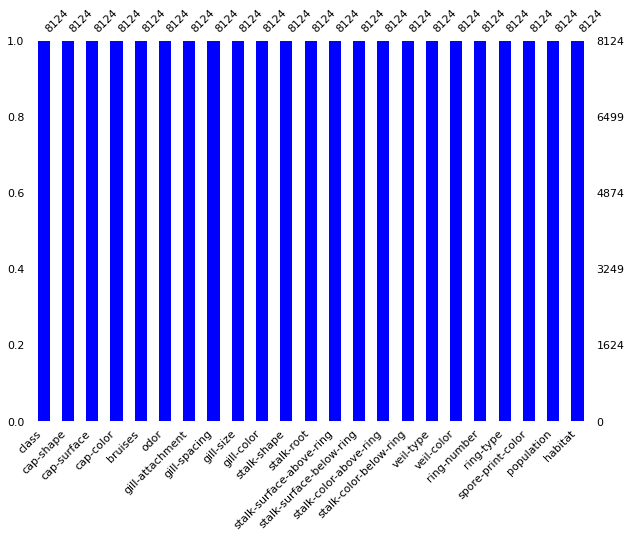

In [7]:
import missingno as msg

msg.bar(mushroom,color = 'blue',figsize=(10,7),fontsize = 11)

La base de Hongos no cuentan con ningun valor nulo dentro de el

**Descripcion de la base de datos**

In [8]:
mushroom.describe(include='category').T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


Graficar las variables de la informacion de los hongos que tenemos

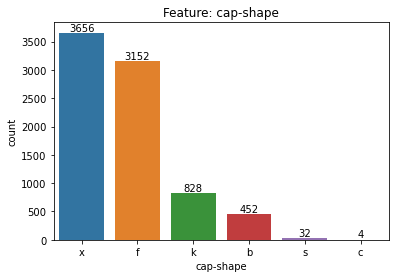

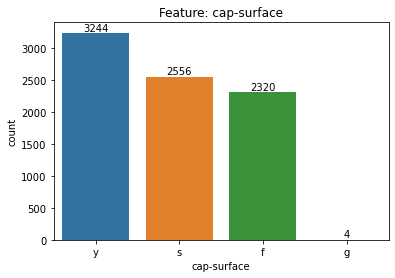

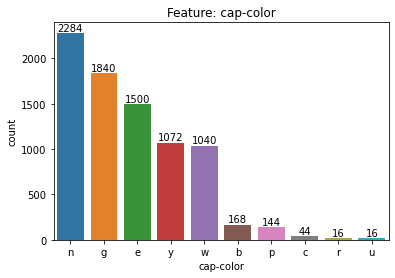

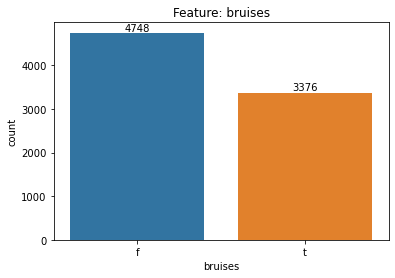

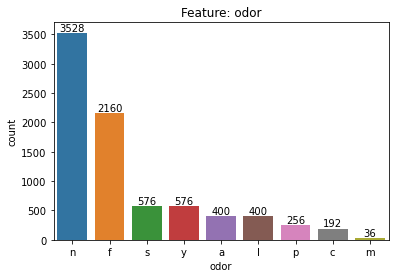

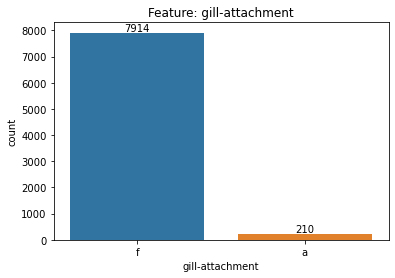

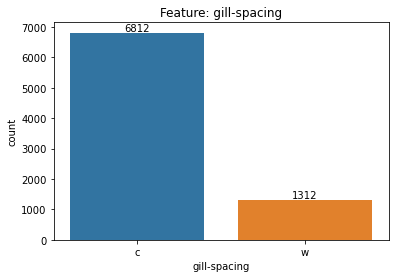

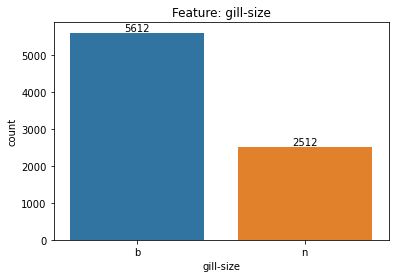

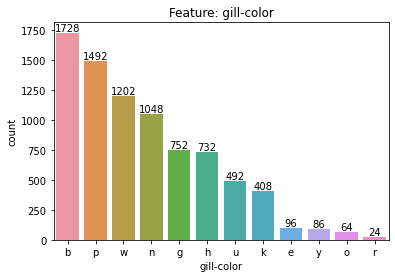

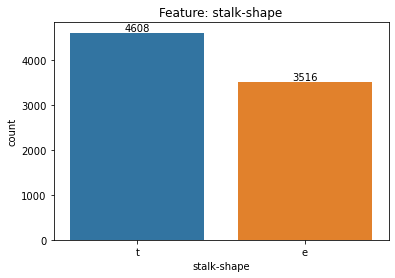

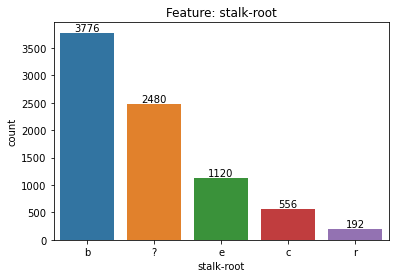

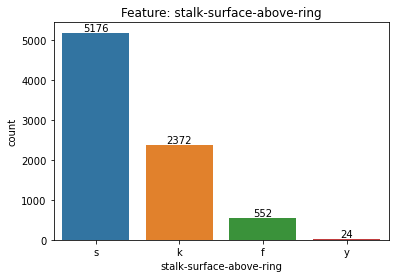

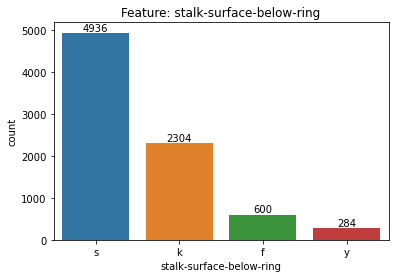

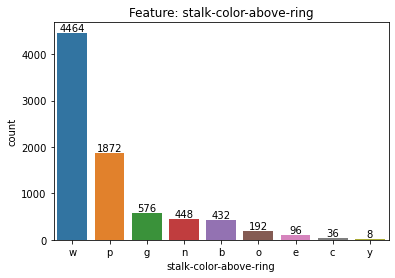

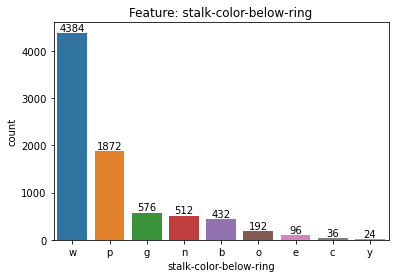

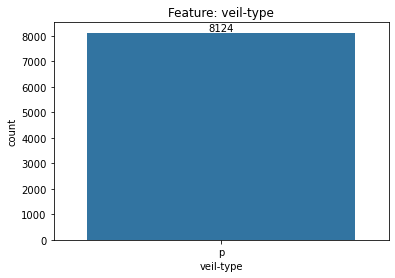

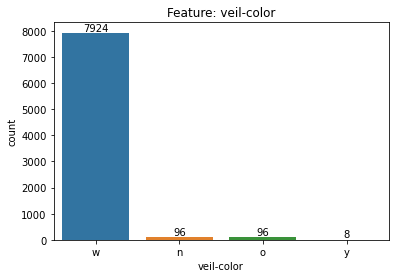

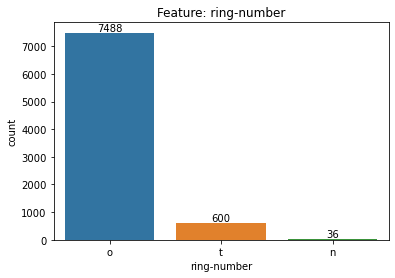

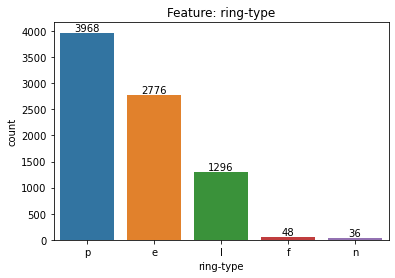

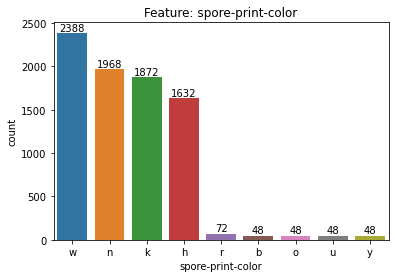

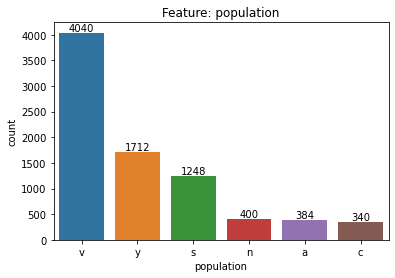

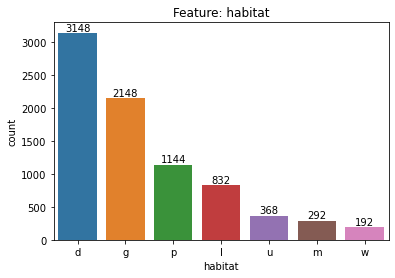

In [9]:
for features in mushroom.columns:
    if features!= 'class':
        import warnings
        warnings.filterwarnings('ignore')
        sns.countplot(mushroom[features],order = mushroom[features].value_counts().index).set_title('Feature: {}'.format(features))
        for index, value in enumerate(mushroom[features].value_counts().values):
            plt.text(index,value,str(value), ha = 'center', va= 'bottom')
        plt.show()

Se grafica la distribucion de los hongos por su clase: __`Comestible`__ y __`Venenosa`__ y por cada variable.

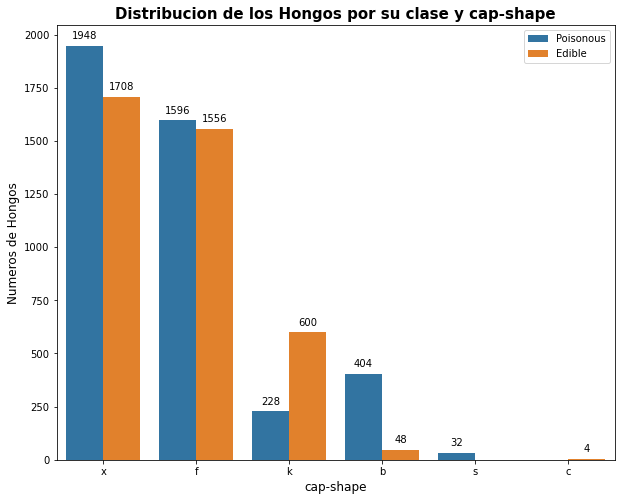

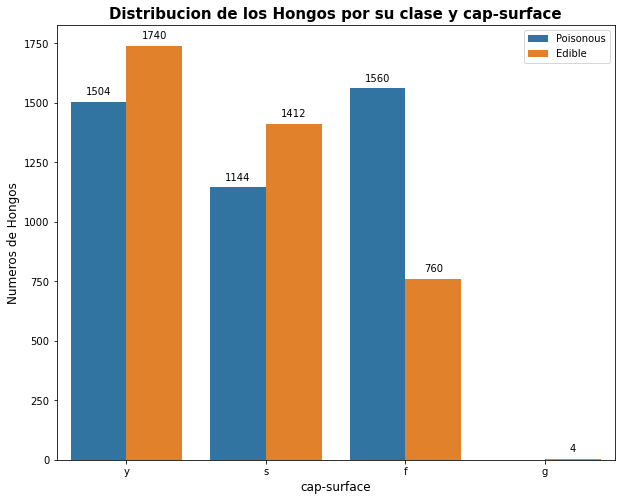

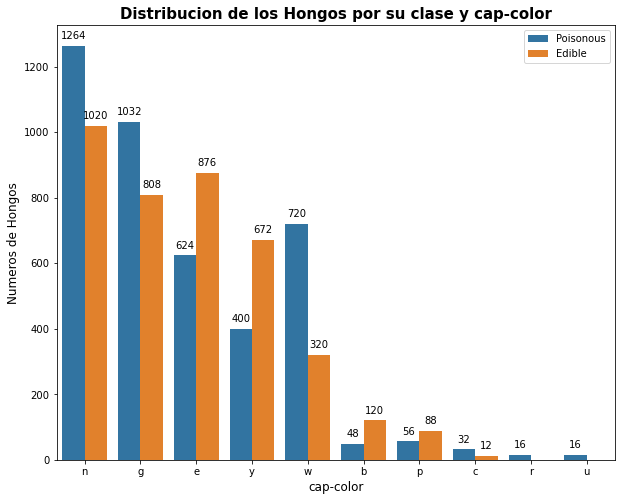

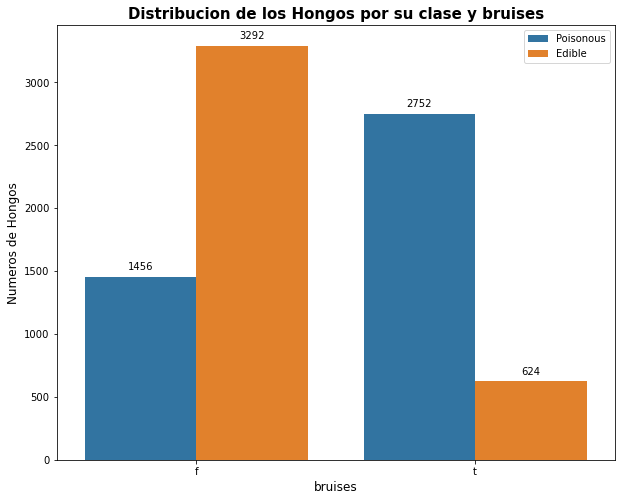

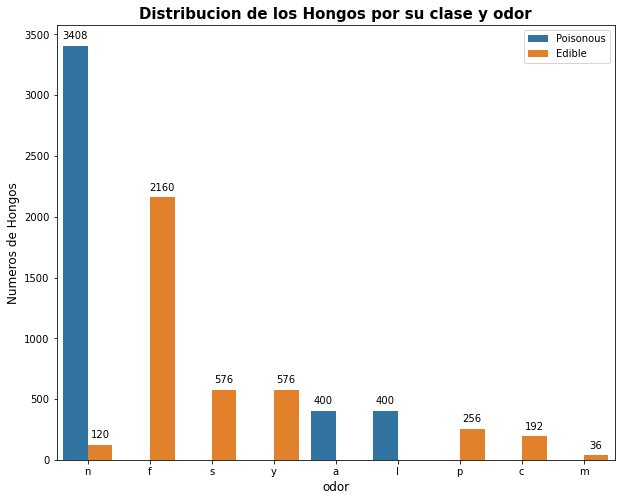

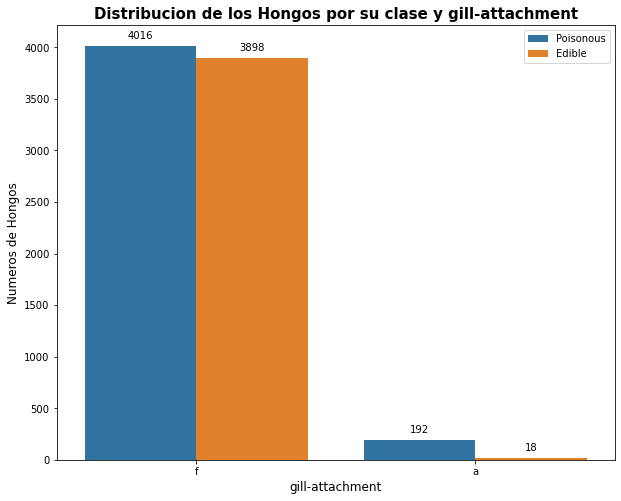

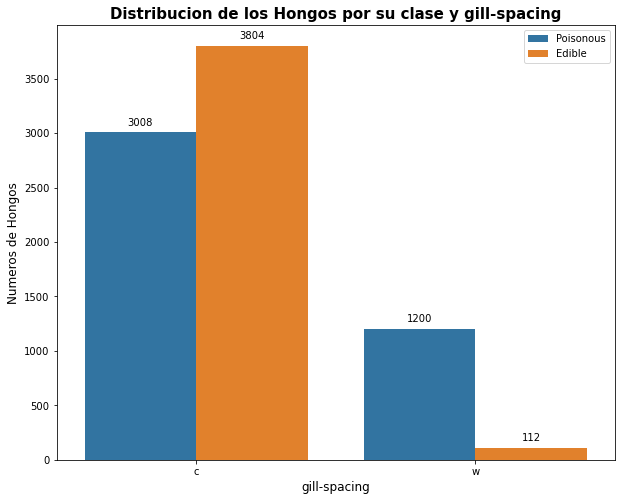

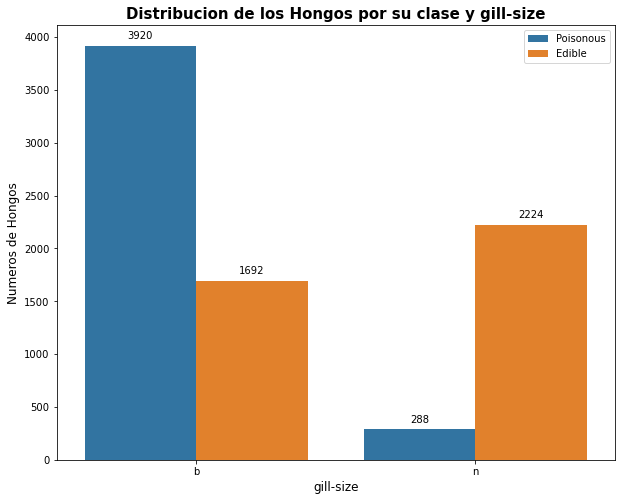

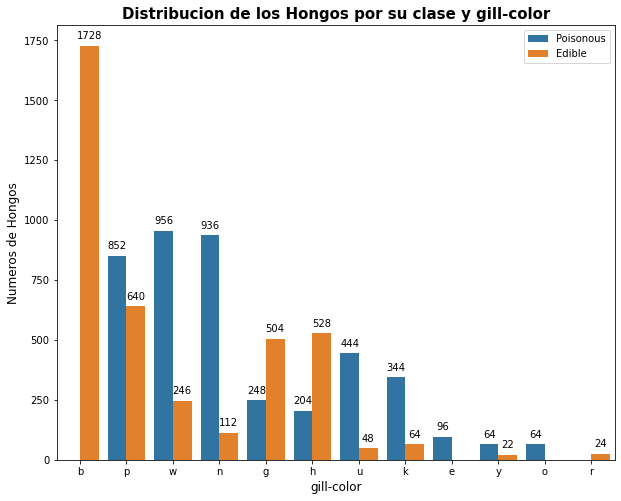

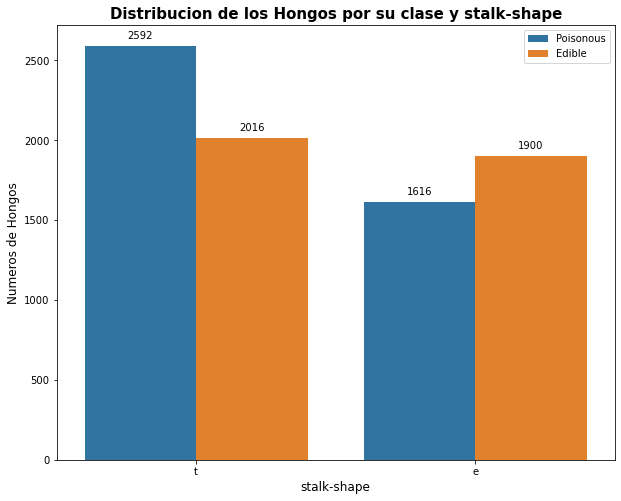

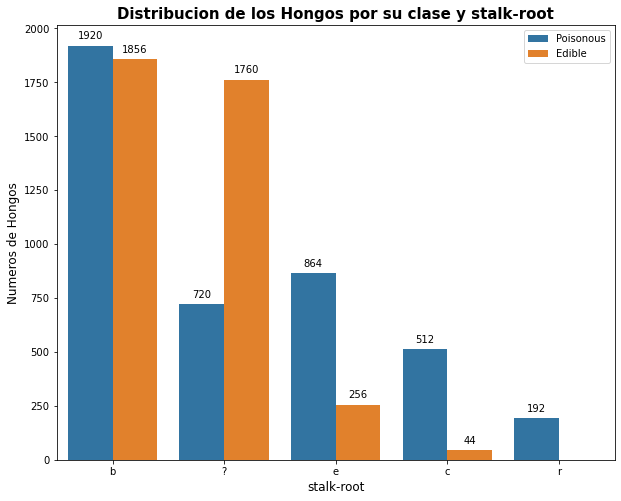

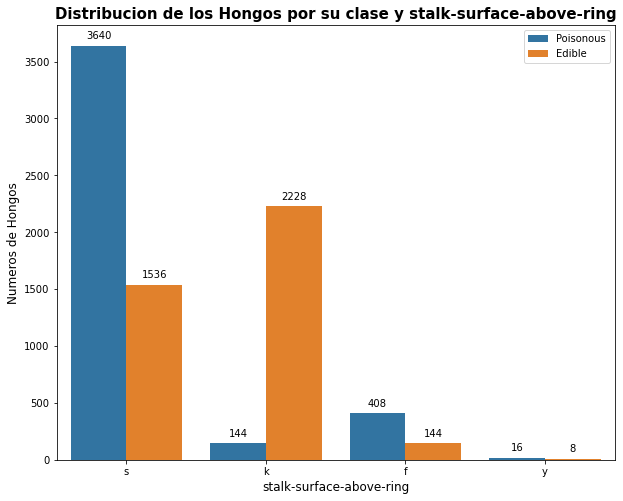

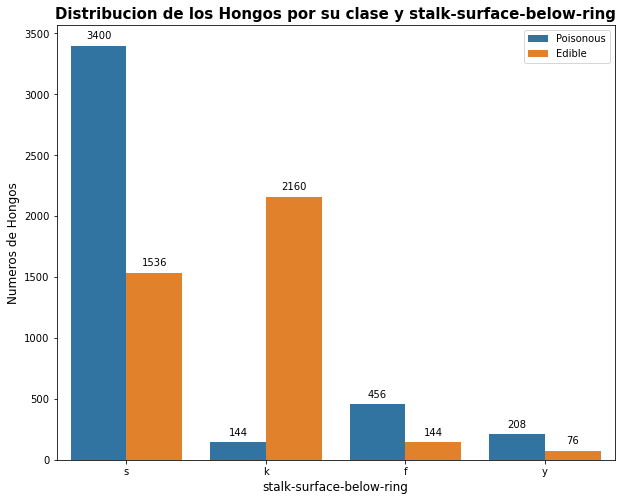

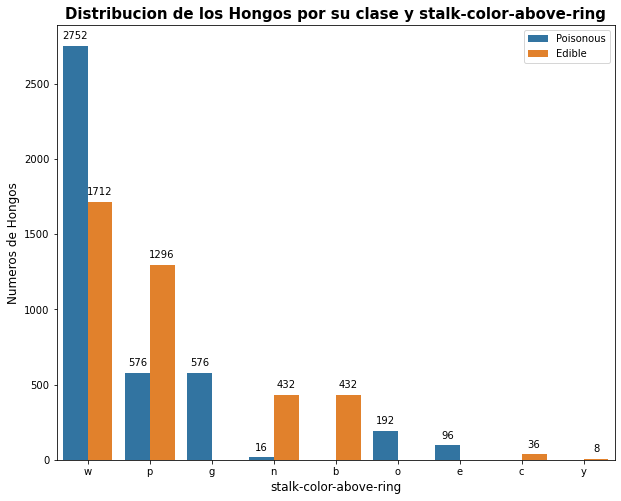

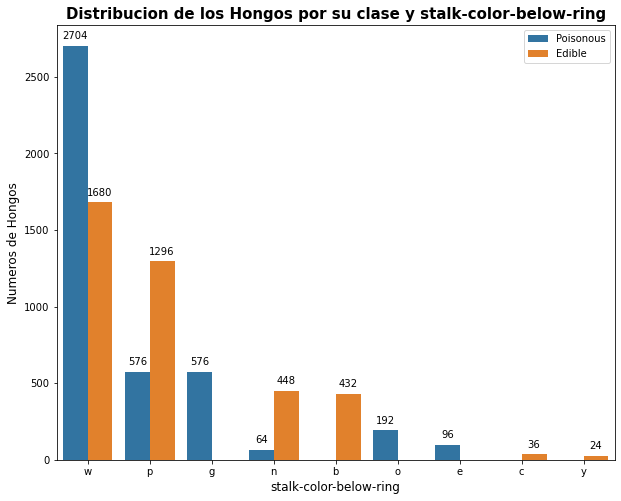

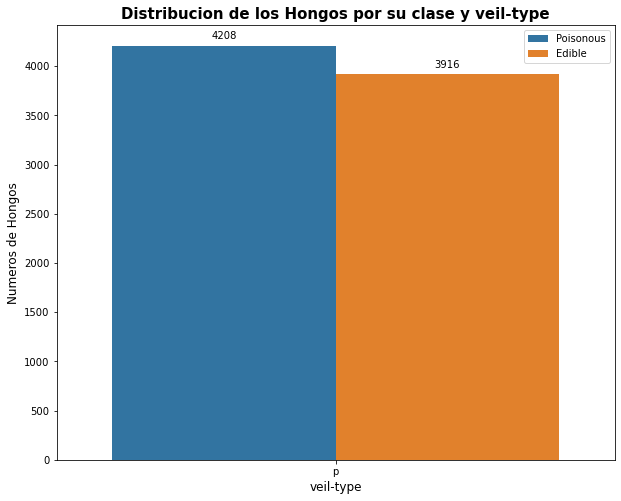

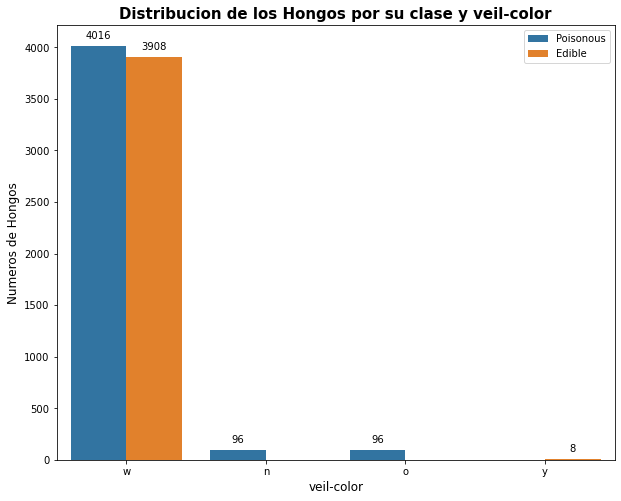

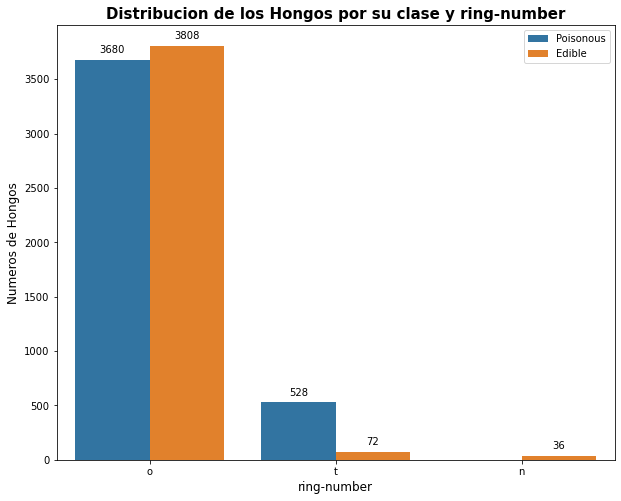

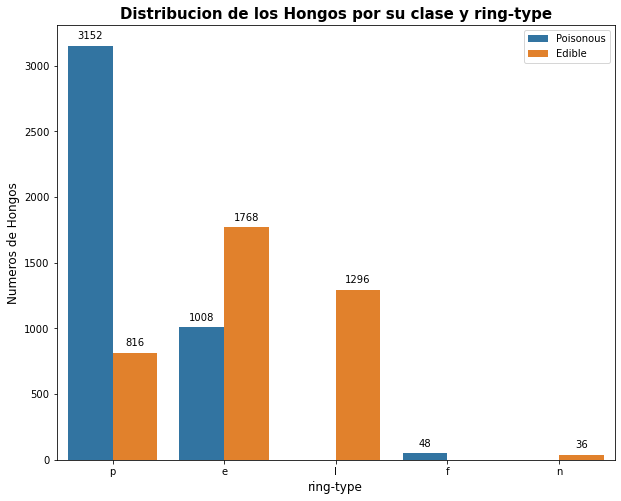

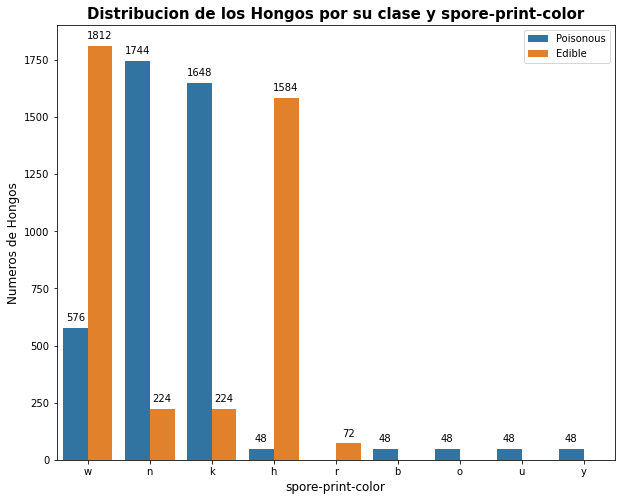

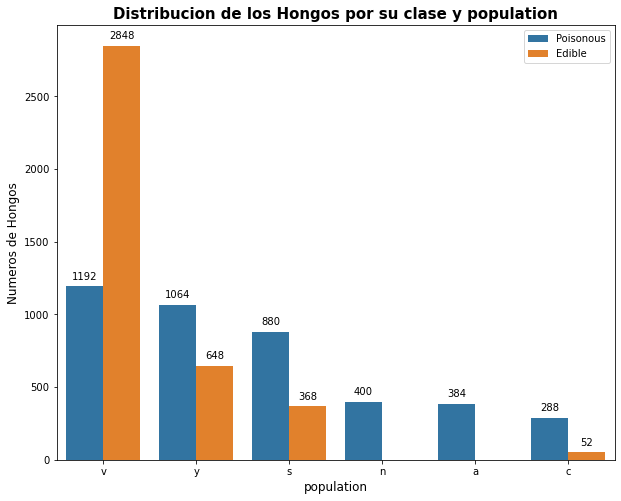

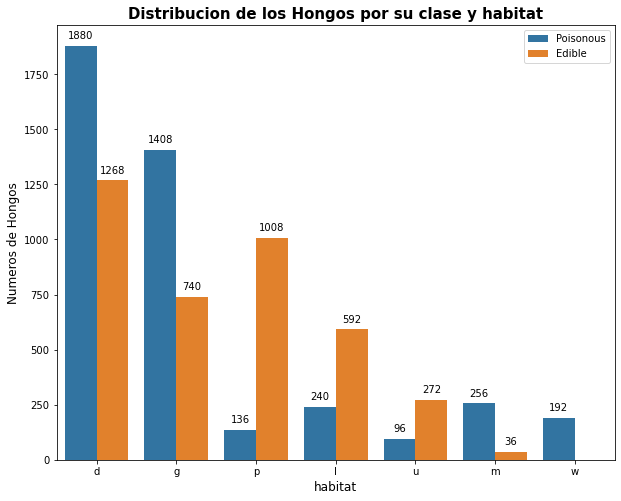

In [10]:
for columns in mushroom.columns:
    if columns != 'class':
        plt.figure(figsize=(10,8))
        multi_plot=sns.countplot(x = mushroom[columns],
                    hue = mushroom['class'],
                    order= mushroom[columns].value_counts().index)

        for p in multi_plot.patches:
            multi_plot.annotate(format(p.get_height(),'.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va = 'center',
            xytext = (0,10),
            textcoords = 'offset points'
            )
        plt.ylabel('Numeros de Hongos',fontsize=12)
        plt.xlabel(columns,fontsize=12)
        plt.legend(['Poisonous','Edible'],loc = 'upper right')
        plt.title('Distribucion de los Hongos por su clase y '+columns,fontsize =15,fontweight='bold')
        plt.show()


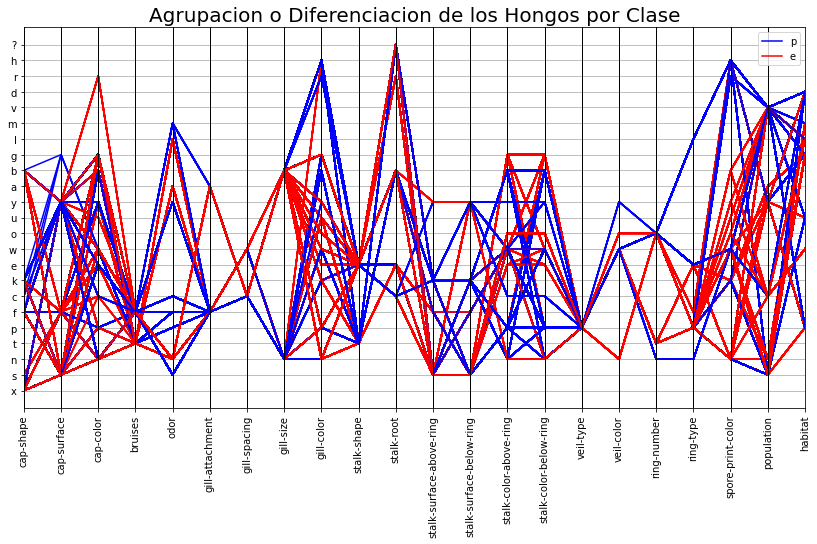

In [11]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(14,7))
plt.title('Agrupacion o Diferenciacion de los Hongos por Clase',fontsize='20')
parallel_coordinates(mushroom,'class',color=('blue','red'))
plt.xticks(rotation=90)
plt.show()

---

## Machine Learning

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_predict, cross_val_score

### Feature engineering

In [13]:
mushroom1 = mushroom.copy()

Como solo contamos con variables categoricas usaremos `LabelEncoder` para convertirlo a ordinal

In [14]:
labelenconder = LabelEncoder()
for colum in mushroom1.columns:
    mushroom1[colum] = labelenconder.fit_transform(mushroom1[colum])

#Revisemos de nuevo los datos
mushroom1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [15]:
len(mushroom1.columns)

23

Revisaremos los valores de las variables que acabamos de transformar

In [16]:
for i in mushroom1.columns:
    print(f'Unique Value for {i}: ',mushroom1[i].unique())

Unique Value for class:  [1 0]
Unique Value for cap-shape:  [5 0 4 2 3 1]
Unique Value for cap-surface:  [2 3 0 1]
Unique Value for cap-color:  [4 9 8 3 2 5 0 7 1 6]
Unique Value for bruises:  [1 0]
Unique Value for odor:  [6 0 3 5 2 1 8 7 4]
Unique Value for gill-attachment:  [1 0]
Unique Value for gill-spacing:  [0 1]
Unique Value for gill-size:  [1 0]
Unique Value for gill-color:  [ 4  5  2  7 10  3  9  1  0  8 11  6]
Unique Value for stalk-shape:  [0 1]
Unique Value for stalk-root:  [3 2 1 4 0]
Unique Value for stalk-surface-above-ring:  [2 0 1 3]
Unique Value for stalk-surface-below-ring:  [2 0 3 1]
Unique Value for stalk-color-above-ring:  [7 3 6 4 0 2 5 1 8]
Unique Value for stalk-color-below-ring:  [7 6 3 0 4 2 8 5 1]
Unique Value for veil-type:  [0]
Unique Value for veil-color:  [2 0 1 3]
Unique Value for ring-number:  [1 2 0]
Unique Value for ring-type:  [4 0 2 1 3]
Unique Value for spore-print-color:  [2 3 6 1 7 5 4 8 0]
Unique Value for population:  [3 2 0 4 5 1]
Unique Val

Observamos que la variable `veil-type` solo tiene un valor que es 0, por lo cual no agrega nada al analisis, el cual se va a eliminar

In [17]:
mushroom1 = mushroom1.drop(columns=['veil-type'])

In [18]:
mushroom1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


Con las variables transformadas se vera la distribucion de ella en una grafica de violin por clase

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'cap-shape'),
  Text(1, 0, 'cap-surface'),
  Text(2, 0, 'cap-color'),
  Text(3, 0, 'bruises'),
  Text(4, 0, 'odor'),
  Text(5, 0, 'gill-attachment'),
  Text(6, 0, 'gill-spacing'),
  Text(7, 0, 'gill-size'),
  Text(8, 0, 'gill-color'),
  Text(9, 0, 'stalk-shape'),
  Text(10, 0, 'stalk-root'),
  Text(11, 0, 'stalk-surface-above-ring'),
  Text(12, 0, 'stalk-surface-below-ring'),
  Text(13, 0, 'stalk-color-above-ring'),
  Text(14, 0, 'stalk-color-below-ring'),
  Text(15, 0, 'veil-color'),
  Text(16, 0, 'ring-number'),
  Text(17, 0, 'ring-type'),
  Text(18, 0, 'spore-print-color'),
  Text(19, 0, 'population'),
  Text(20, 0, 'habitat')])

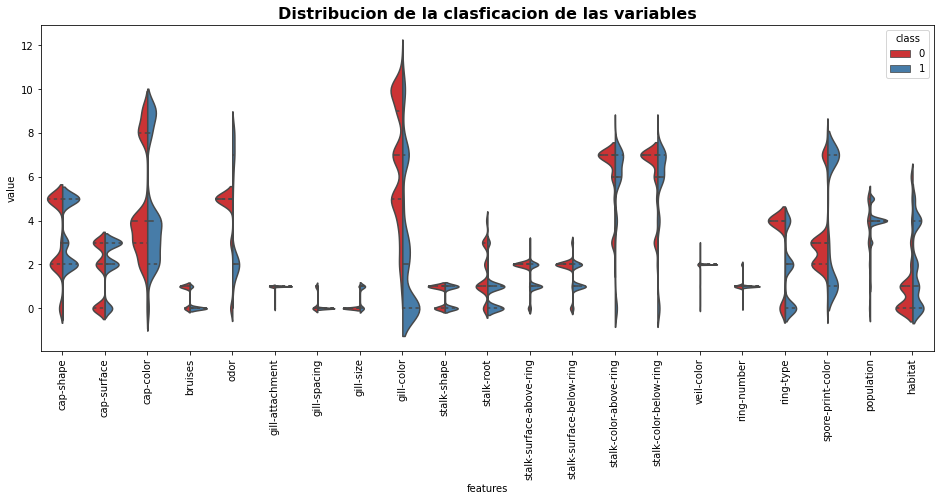

In [19]:
# Violin PLot
df_div = pd.melt(mushroom1,'class',var_name='features')
plt.subplots(figsize=(16,6))
sns.violinplot(data = df_div, x = 'features',y = 'value',
                hue = 'class',split=True, inner = 'quartile',
                palette='Set1',)
plt.title('Distribucion de la clasficacion de las variables',fontsize= 16,fontweight='bold')
plt.xticks(rotation= 90)

Text(0.5, 1.0, 'Matriz de correlación')

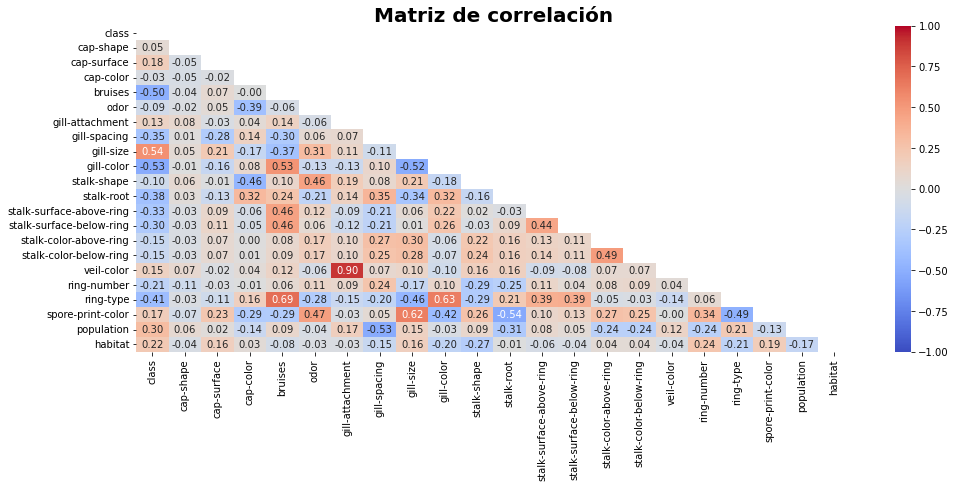

In [20]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(mushroom1.corr(), dtype=bool))
mush = sns.heatmap(mushroom1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".2f",annot_kws={'size':10})
mush.set_title('Matriz de correlación', fontdict={'fontsize':20,'fontweight':'bold'}, pad=3 )

Por lo general en casos de clasificacion la variable con menos correlacion es la mas importante, este caso `gill-color` (-0.53) por lo tanto se revisara mas de cerca.

In [21]:
mushroom1[['class','gill-color']].groupby(['gill-color'],
                                            as_index=False).mean().sort_values(by='class',
                                            ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


Para tener una mejor vision de los datos es mejor graficarla

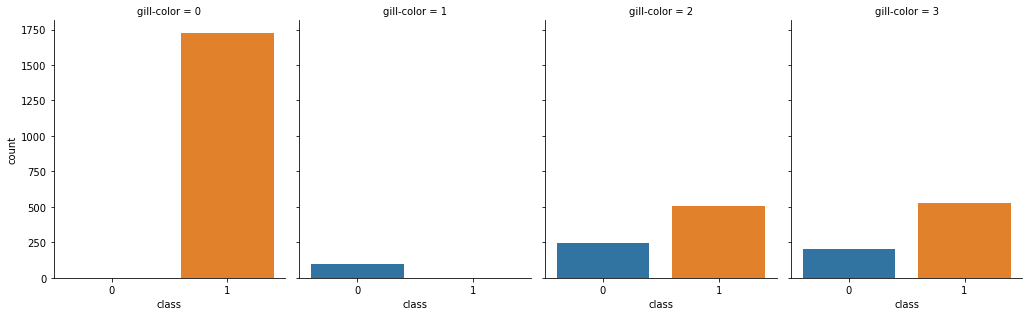

In [22]:
new_var = mushroom1[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']<=3.5]
sns.catplot(x = 'class', col='gill-color', data=new_var, kind='count', height=4.5, aspect=.8, col_wrap=4);

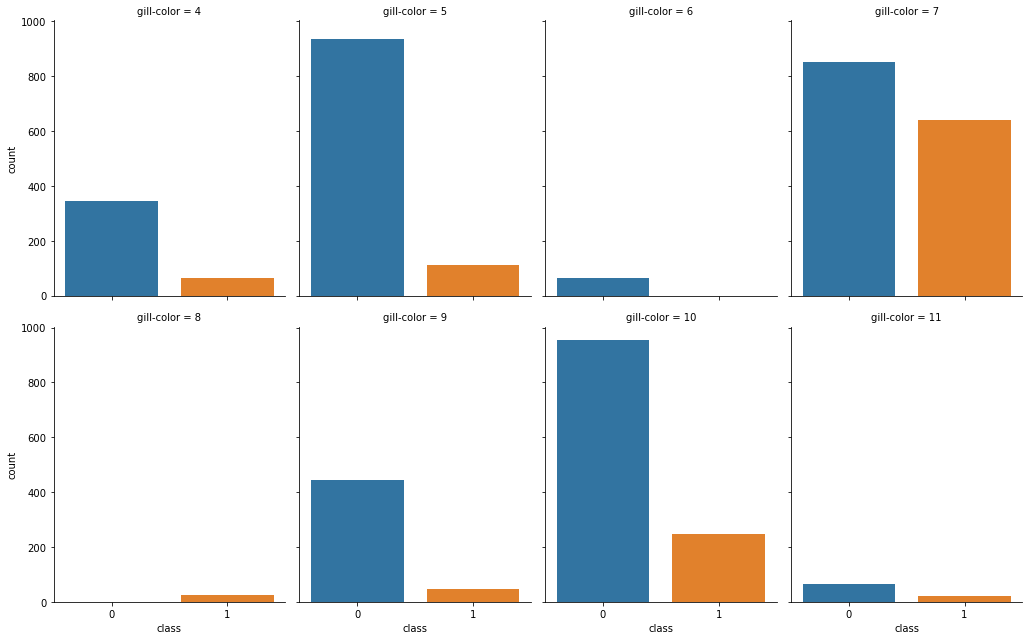

In [23]:
new_var = mushroom1[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']>3.5]
sns.catplot(x = 'class', col='gill-color', data=new_var, kind='count', height=4.5, aspect=.8, col_wrap=4);

separa los predictores de la variable respuesta

In [24]:
X = mushroom1.drop(columns=['class'])
y = mushroom1['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

### Metodos de Clasificacion

####  Decision Tree Classification

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

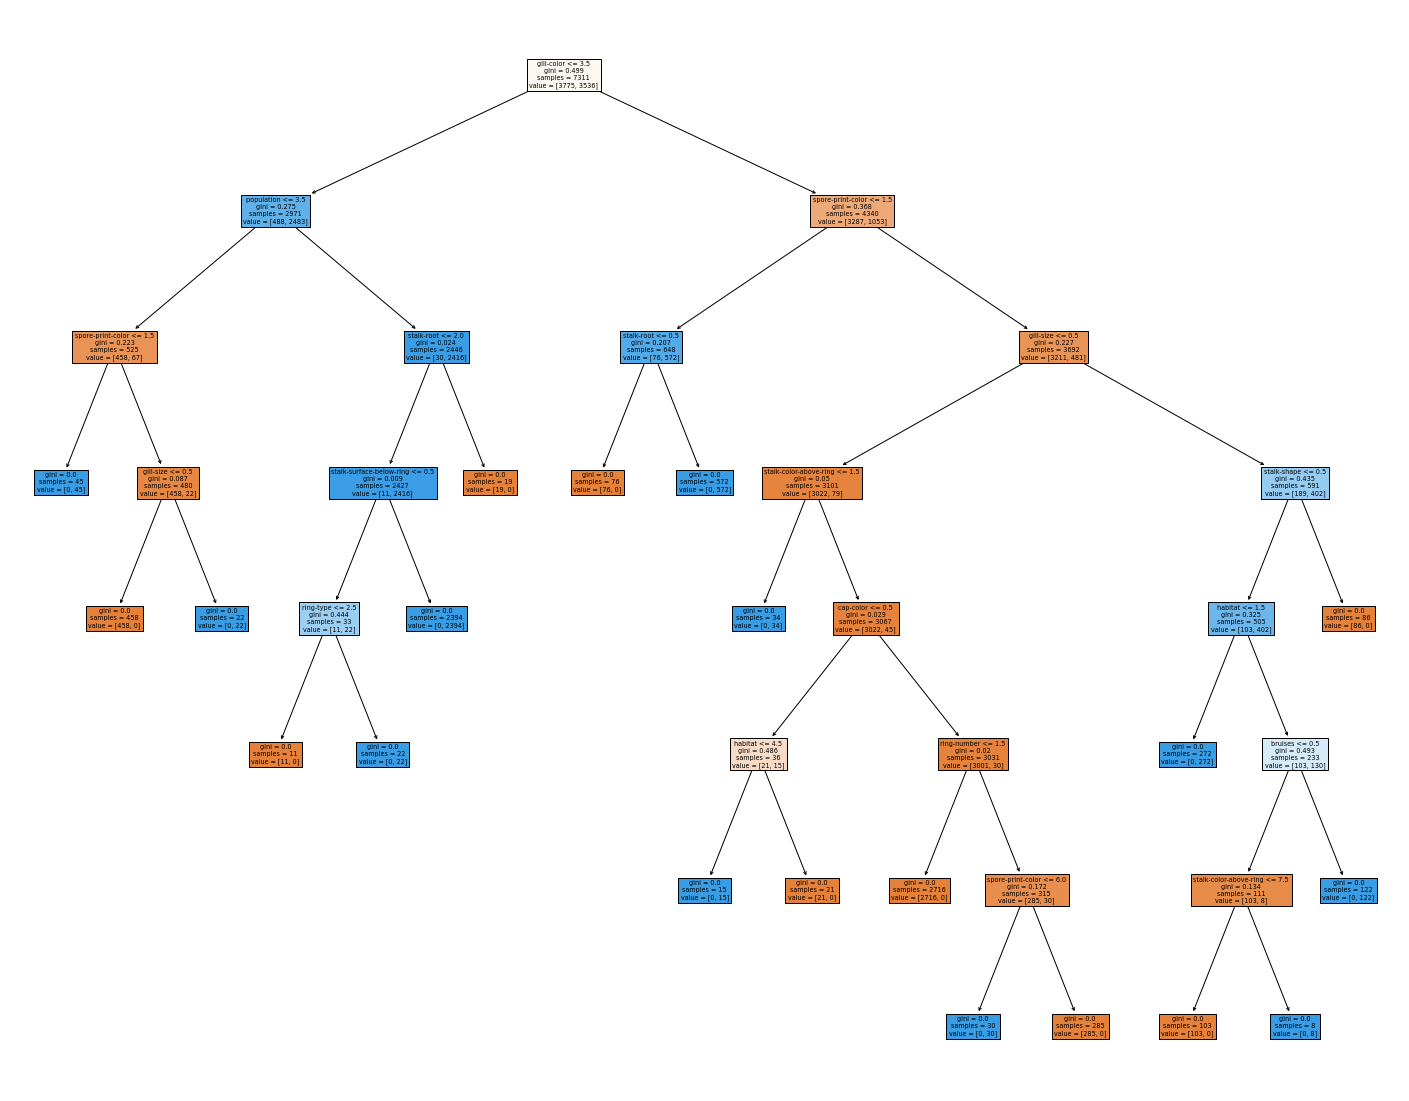

In [26]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                    feature_names = X.columns,
                    filled = True)

__Caracteristicas Importantes__

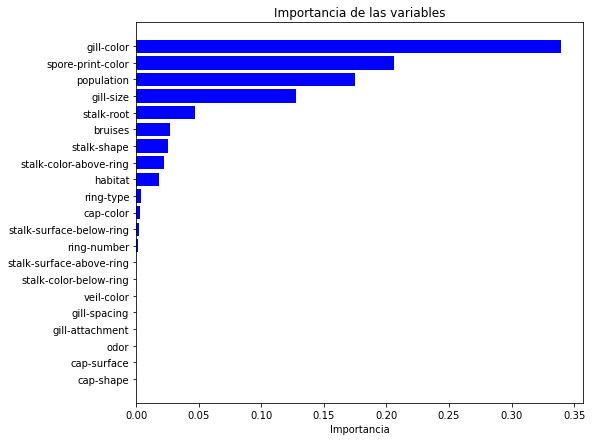

In [27]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="blue")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importancia')
plt.title('Importancia de las variables')
plt.draw()


__Prediciendo y estimando el resultado del modelo__

In [28]:
y_pred_dt = dt.predict(X_test)

print("Reporte del arbol de desicion: \n",
        classification_report(y_test,y_pred_dt))

print("Test Accuracy: {}%".format(round(dt.score(X_test,y_test)*100,2)))

Reporte del arbol de desicion: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

Test Accuracy: 100.0%


__Confusion Matrix for Decision Tree Classifiers__

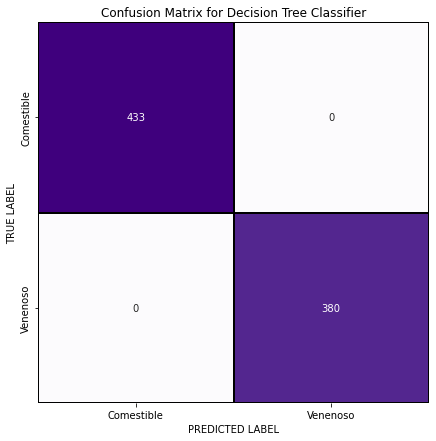

In [29]:
plt.figure(figsize=(7,7))

cm = confusion_matrix(y_test,y_pred_dt)

x_axis_labels = ["Comestible", "Venenoso"]
y_axis_labels = ["Comestible", "Venenoso"]
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", cmap="Purples",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels, cbar = False)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

#### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression(solver = 'lbfgs',max_iter=500)
lr.fit(X_train, y_train)

print('Test Accuracy: {}%'.format(round(lr.score(X_test,y_test)*100,2)))

Test Accuracy: 94.96%


__Classificacion Report de Logistic Regression__

In [32]:
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Classifier report: \n",
        classification_report(y_test,y_pred_lr))

Logistic Regression Classifier report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       433
           1       0.94      0.96      0.95       380

    accuracy                           0.95       813
   macro avg       0.95      0.95      0.95       813
weighted avg       0.95      0.95      0.95       813



__Confusion Matrix for Logistic Regression__

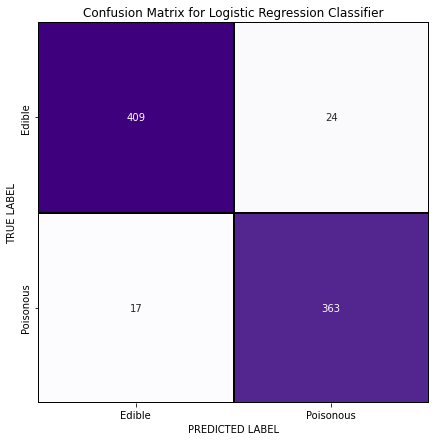

In [33]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f",
            ax=ax, cmap="Purples", xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, cbar = False)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

#### KNN Classification

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
best_Kvalue = 0
best_score = 0

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i

print("best Kvalue: {}".format(best_Kvalue),'\n')

print('Test Accuracy: {}%'.format(round(best_score * 100,2)))

best Kvalue: 1 

Test Accuracy: 100.0%


__Classification report KNN Classifier__

In [36]:
y_pred_knn = knn.predict(X_test)

print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       433
           1       0.99      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



__Confusion Matrix KNN Classifier__

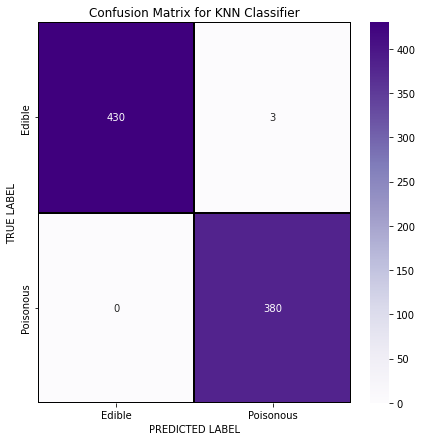

In [37]:
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

#### SVM Classification

In [38]:
from sklearn.svm import SVC

In [39]:
svm = SVC(random_state=2, gamma='auto')
svm.fit(X_train,y_train)

print('Test Accuracy: {}%'.format(round(svm.score(X_test,y_test)*100,2)))

Test Accuracy: 100.0%


__Classification Report SVM Classifier__

In [40]:
y_pred_svm = svm.predict(X_test)

print('SVM Classifier report: \n', classification_report(y_test, y_pred_svm))

SVM Classifier report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



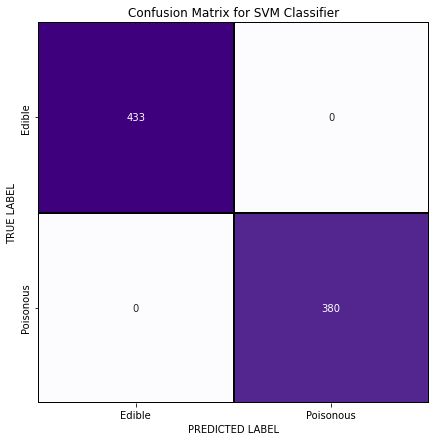

In [41]:
svm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(svm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f",
            ax=ax, cmap="Purples", xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, cbar = False)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

#### Random Forest Classification

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier(n_estimators=100, random_state=2)
rf.fit(X_train,y_train)
print('Test Accuracy: {}%'.format(round(rf.score(X_test,y_test)*100,2)))

Test Accuracy: 100.0%


__Classification Report Random Forest Classifier__

In [44]:
y_pred_rf = rf.predict(X_test)

print('Random Forest Classifier Report: \n',classification_report(y_test, y_pred_rf) )

Random Forest Classifier Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       433
           1       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



__Confusion Matrix Random Forest Classifier__

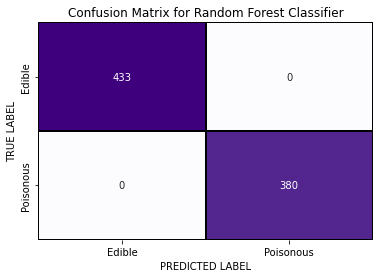

In [45]:
rf = confusion_matrix(y_test,y_pred_rf)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

sns.heatmap(rf, annot = True,linewidths=0.2,linecolor='black',
            cmap='Purples',xticklabels=x_axis_labels,fmt='.0f',
            yticklabels=y_axis_labels,cbar=False)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
plt.show()

Algunas predicciones de el resultado X_test del Random Forest

In [46]:
preds = dt.predict(X_test)

print('Prediccion del modelo:\n', preds[:36])
print('y de Prueba del modelo:\n',y_test[:36].values)
# 0 - Edible
# 1 - Poisonous

Prediccion del modelo:
 [0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
y de Prueba del modelo:
 [0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


Observamos que los modelos tienen una precision del 100%, el cual nos indica que esta sobreentrenado, entonces se va a dar un paso mas en la transformacion de los datos

In [47]:
X = pd.get_dummies(X, columns = X.columns, drop_first = True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Text(0.5, 1.0, 'Matriz de correlación')

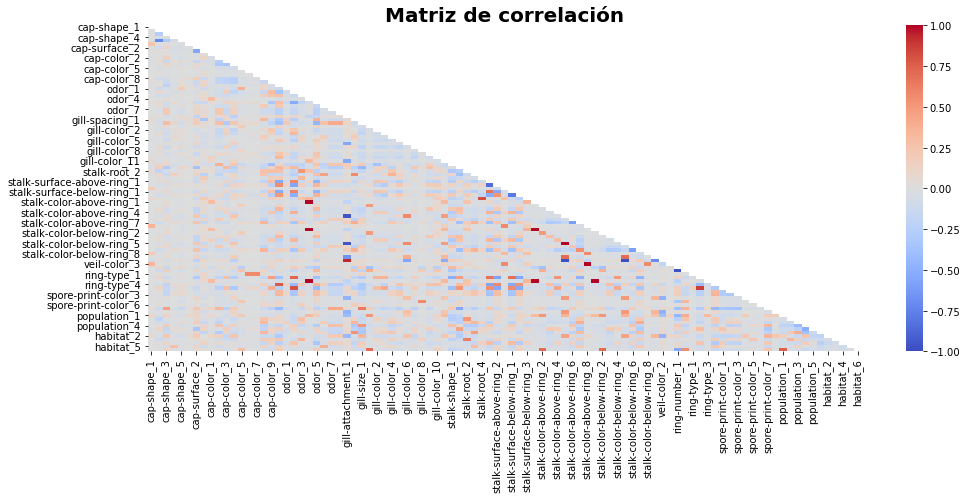

In [48]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(X.corr(), dtype=bool))
mush = sns.heatmap(X.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='coolwarm', fmt=".2f",annot_kws={'size':10})
plt.yticks(rotation = 0)
mush.set_title('Matriz de correlación', fontdict={'fontsize':20,'fontweight':'bold'}, pad=3 )

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.1)

In [50]:
# Estandarizar las variables
sc = StandardScaler()

sc.fit(X_train)
X2 = sc.fit_transform(X)
print(list(X2)[1])


[-0.02219484 -0.79620985 -0.33687808 -0.062885    1.10548662 -0.02219484
  1.47594165 -0.81532454 -0.07379393 -0.47586687 -0.54111656 -0.6253766
 -0.1343321  -0.04442251 -0.04442251 -0.38315756  2.56483103  1.18591657
 -0.15558197 -0.60180814 -0.22756678 -0.0667161  -0.87614155 -0.18037976
 -0.27624555 -0.27624555  0.16289645 -0.43886364 -0.66903831 -0.10935331
 -0.31938628 -0.31468393  4.34876588 -0.38484578 -0.08910918 -0.47430986
 -0.05443311 -0.25390039 -0.41671241 -0.10343684 -1.14480575 -0.93190411
  3.6893781  -0.39988576 -0.15558197 -0.64216688  0.75468654 -0.05443311
 -0.62918701  0.80365857 -0.19032732 -0.0667161  -0.10935331 -0.27624555
 -0.24158587 -0.15558197 -0.54719666  0.90547914 -0.03139597 -0.0667161
 -0.10935331 -0.27624555 -0.2593496  -0.15558197 -0.54719666  0.92363531
 -0.05443311 -0.10935331  0.15887032 -0.03139597  0.29143764 -0.28239125
 -0.07709433 -0.43566808 -0.0667161   1.02341538 -0.50138441 -0.54719666
  1.76862907 -0.07709433 -0.0945615  -0.07709433 -0.6

In [51]:
X_test = sc.transform(X_test)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

Eligiendo unicamente los 2 variables mas importantes del las variables para el modelo 

Usaremos __PRINCIPAL COMPONENT ANALYSIS (PCA)__

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train) 
X_test_pca=pca.transform(X_test)
print("Original shape:",X_train.shape)
print('Shape of PCA data:',X_train_pca.shape)

Original shape: (5686, 95)
Shape of PCA data: (5686, 2)


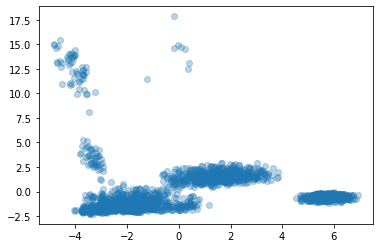

In [54]:
plt.scatter(X_test_pca[:,0], X_test_pca[:,1],alpha=.3)

In [55]:
X_train_pca

array([[ 0.33039359, -1.30634526],
       [-1.20301196, -1.80806207],
       [ 5.31355307, -0.56809747],
       ...,
       [-1.6783477 , -0.88666782],
       [ 1.53464079,  1.71770386],
       [-1.16725337,  0.11549553]])

#### __Logistic Regression__

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

LogisticRegression()

In [57]:
print("Resultado del entrenamiento del modelo:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,lr.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,lr.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,lr.predict(X_train_pca))))
res = cross_val_score(lr, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

Resultado del entrenamiento del modelo:

Accuracy Score: 0.9061

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2951
           1       0.96      0.84      0.90      2735

    accuracy                           0.91      5686
   macro avg       0.91      0.90      0.91      5686
weighted avg       0.91      0.91      0.91      5686


Confusion Matrix:
[[2849  102]
 [ 432 2303]]

Average Accuracy:	0.9066

Standard Deviation:	0.0103


In [58]:
print("Resultado de la prueba del modelo:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,lr.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,lr.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,lr.predict(X_test_pca))))

Resultado de la prueba del modelo:

Accuracy Score: 0.9028

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1257
           1       0.96      0.83      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438


Confusion Matrix:
[[1218   39]
 [ 198  983]]



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


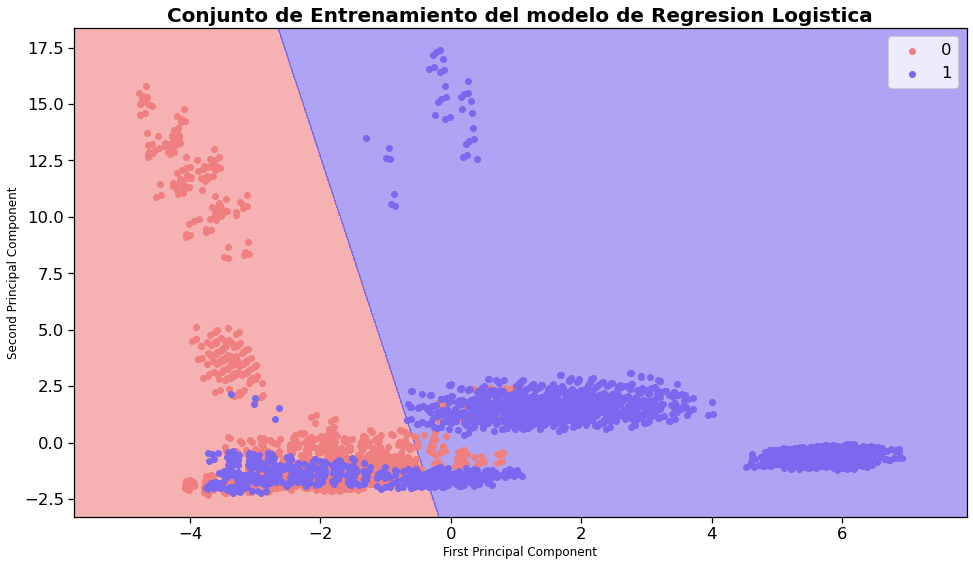

In [59]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Conjunto de Entrenamiento del modelo de Regresion Logistica",fontsize = 20,fontweight='bold')
plt.xlabel('First Principal Component',fontsize = 12)
plt.ylabel('Second Principal Component',fontsize = 12)
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


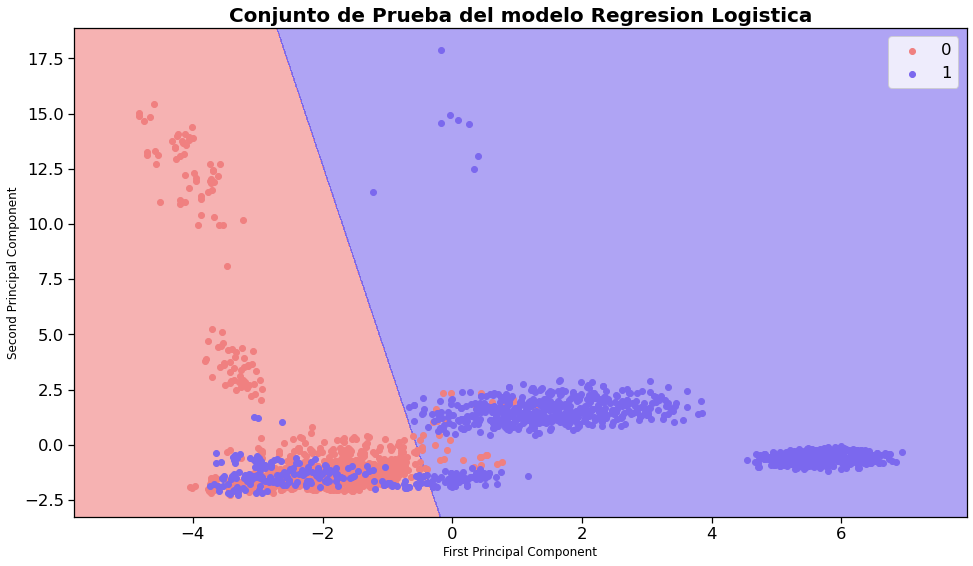

In [60]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Conjunto de Prueba del modelo Regresion Logistica",fontsize =20,fontweight = "bold")
plt.xlabel('First Principal Component',fontsize =12)
plt.ylabel('Second Principal Component',fontsize =12)
plt.legend()

#### __Decision Tree__

In [61]:
from sklearn.tree import DecisionTreeClassifier as DT

dt = DT(criterion='entropy',random_state=42)
dt.fit(X_train_pca,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [62]:
print("Resultado del entrenamiento del modelo:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,dt.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,dt.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,dt.predict(X_train_pca))))
res = cross_val_score(dt, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

Resultado del entrenamiento del modelo:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	0.8908

Standard Deviation:	0.0110


In [63]:
print("Resultado del entrenamiento del modelo:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,dt.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,dt.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,dt.predict(X_test_pca))))

Resultado del entrenamiento del modelo:

Accuracy Score: 0.8929

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1257
           1       0.89      0.89      0.89      1181

    accuracy                           0.89      2438
   macro avg       0.89      0.89      0.89      2438
weighted avg       0.89      0.89      0.89      2438


Confusion Matrix:
[[1123  134]
 [ 127 1054]]



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


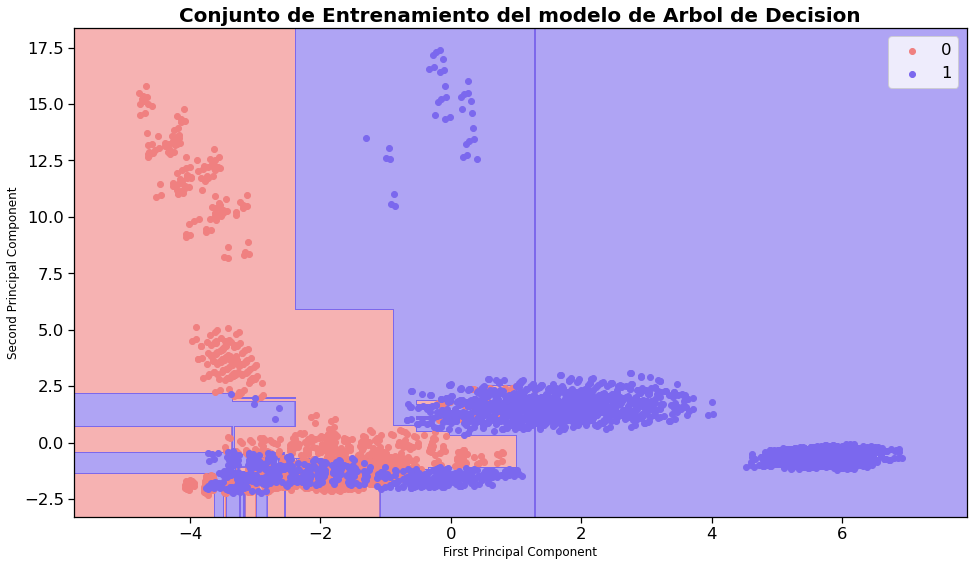

In [64]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dt.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Conjunto de Entrenamiento del modelo de Arbol de Decision",fontsize = 20,fontweight='bold')
plt.xlabel('First Principal Component',fontsize = 12)
plt.ylabel('Second Principal Component',fontsize = 12)
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


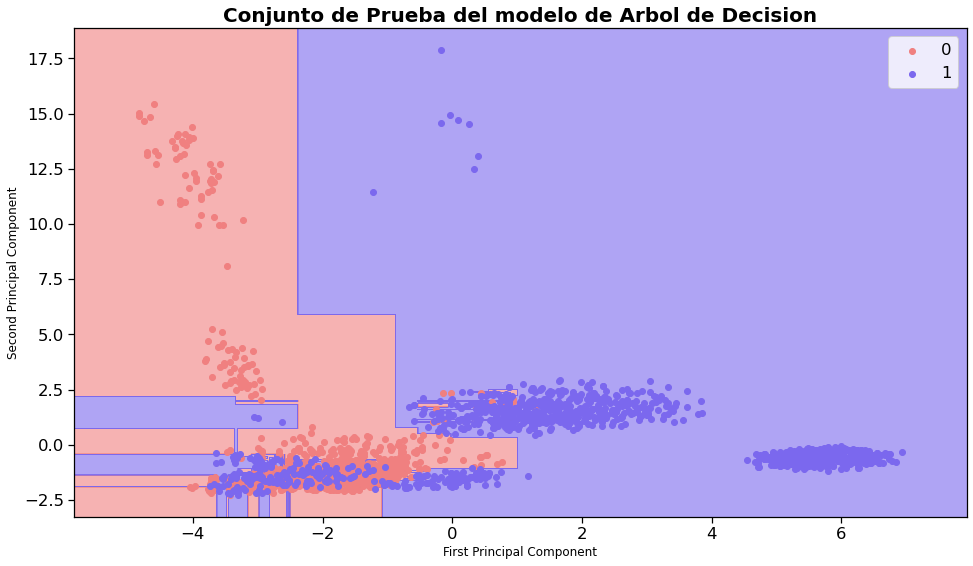

In [65]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dt.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Conjunto de Prueba del modelo de Arbol de Decision",fontsize = 20,fontweight='bold')
plt.xlabel('First Principal Component',fontsize = 12)
plt.ylabel('Second Principal Component',fontsize = 12)
plt.legend()

#### __Support Vector Machines__

In [66]:
from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto", probability=True)
svm.fit(X_train_pca, y_train)

SVC(gamma='auto', probability=True, random_state=42)

In [67]:
print("Resultado del entrenamiendo del modelo:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,svm.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,svm.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,svm.predict(X_train_pca))))
res = cross_val_score(svm, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

Resultado del entrenamiendo del modelo:

Accuracy Score: 0.9240

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2951
           1       0.98      0.86      0.92      2735

    accuracy                           0.92      5686
   macro avg       0.93      0.92      0.92      5686
weighted avg       0.93      0.92      0.92      5686


Confusion Matrix:
[[2893   58]
 [ 374 2361]]

Average Accuracy:	0.9235

Standard Deviation:	0.0104


In [68]:
print("Resultado de la prueba del modelo:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,svm.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,svm.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,svm.predict(X_test_pca))))

Resultado de la prueba del modelo:

Accuracy Score: 0.9192

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1257
           1       0.98      0.85      0.91      1181

    accuracy                           0.92      2438
   macro avg       0.93      0.92      0.92      2438
weighted avg       0.93      0.92      0.92      2438


Confusion Matrix:
[[1234   23]
 [ 174 1007]]



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


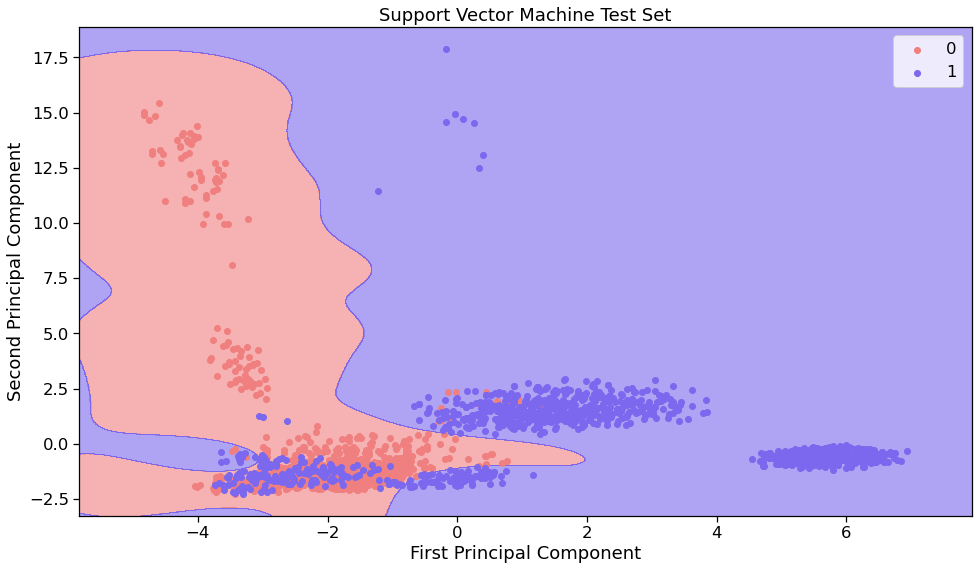

In [69]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Support Vector Machine Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


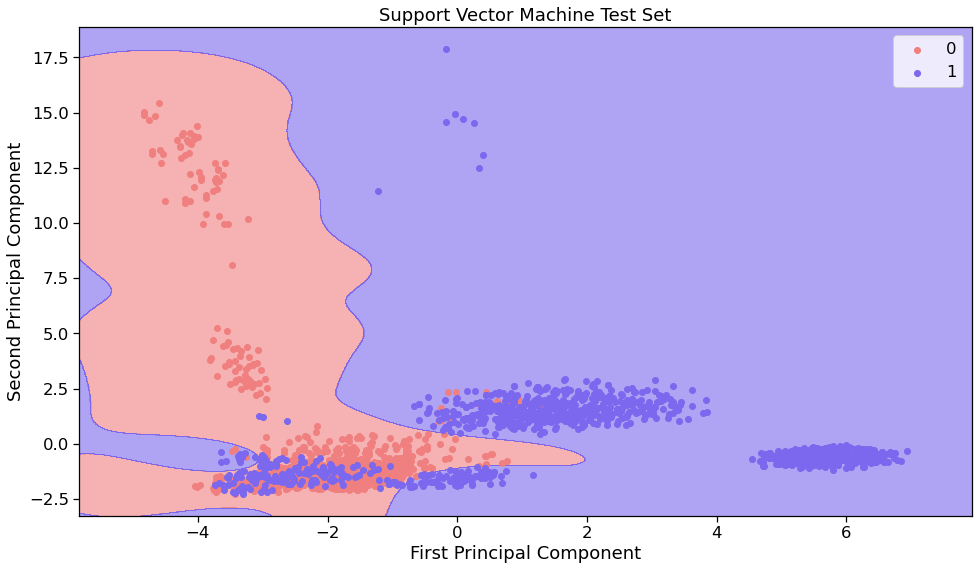

In [70]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Support Vector Machine Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

#### __K-Nearest Neighbors__

In [71]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN()
knn.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [72]:
print("Resultado de entrenamiento del modelo:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,knn.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,knn.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,knn.predict(X_train_pca))))
res = cross_val_score(knn, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

Resultado de entrenamiento del modelo:

Accuracy Score: 0.9432

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2951
           1       0.97      0.91      0.94      2735

    accuracy                           0.94      5686
   macro avg       0.95      0.94      0.94      5686
weighted avg       0.94      0.94      0.94      5686


Confusion Matrix:
[[2872   79]
 [ 244 2491]]

Average Accuracy:	0.9288

Standard Deviation:	0.0103


In [74]:
print("Resultado de la prueba del modelo:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,knn.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,knn.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,knn.predict(X_test_pca))))

Resultado de la prueba del modelo:

Accuracy Score: 0.9204

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1257
           1       0.95      0.88      0.91      1181

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438


Confusion Matrix:
[[1206   51]
 [ 143 1038]]



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


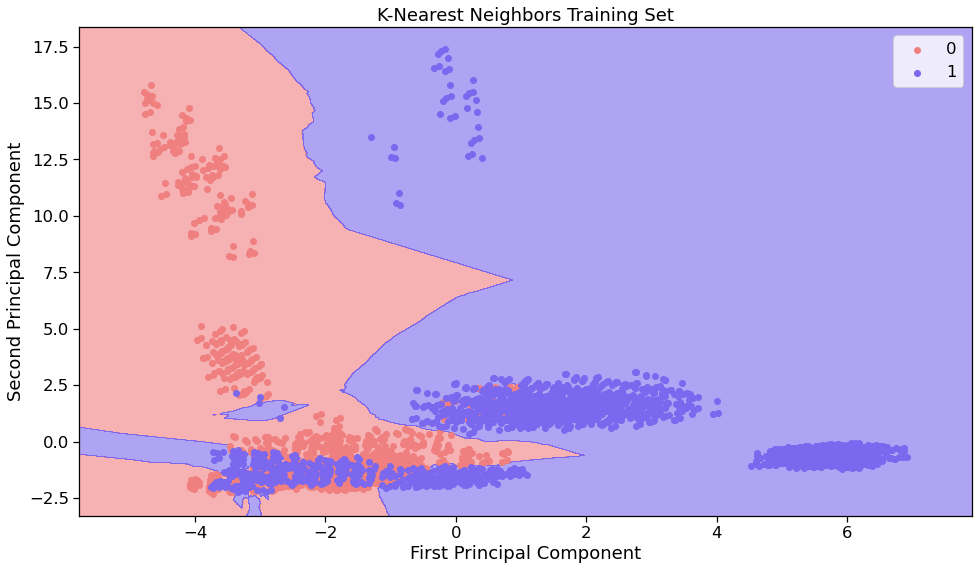

In [75]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("K-Nearest Neighbors Training Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


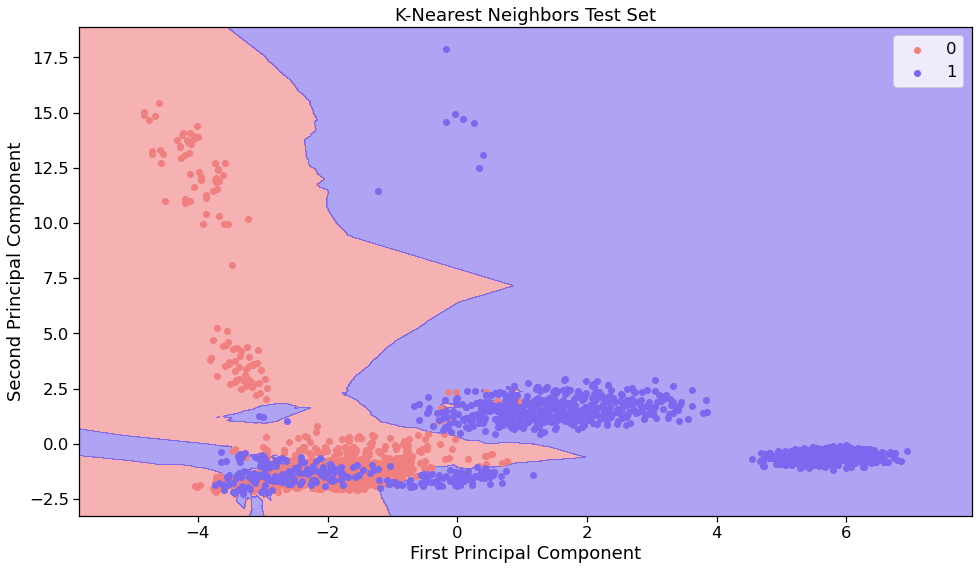

In [76]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("K-Nearest Neighbors Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

#### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf.fit(X_train_pca, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [80]:

print("Resultado del entrenamiento:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,rf.predict(X_train_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_train,rf.predict(X_train_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,rf.predict(X_train_pca))))
res = cross_val_score(rf, X_train_pca, y_train, cv=10, n_jobs=-1, scoring='accuracy')
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
print('Standard Deviation:\t{0:.4f}'.format(res.std()))

Resultado del entrenamiento:

Accuracy Score: 0.9989

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   6 2729]]

Average Accuracy:	0.9242

Standard Deviation:	0.0114


In [81]:
print("resultado de la prueba:\n")
print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,rf.predict(X_test_pca))))
print('Classification Report:\n{}\n'.format(classification_report(y_test,rf.predict(X_test_pca))))
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,rf.predict(X_test_pca))))

resultado de la prueba:

Accuracy Score: 0.9208

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1257
           1       0.95      0.88      0.92      1181

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438


Confusion Matrix:
[[1203   54]
 [ 139 1042]]



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


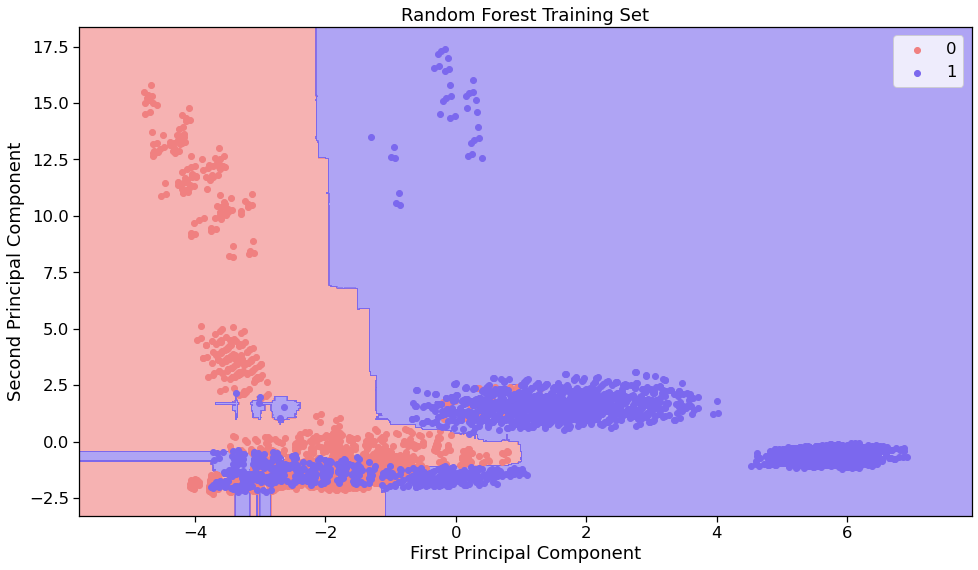

In [78]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Random Forest Training Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


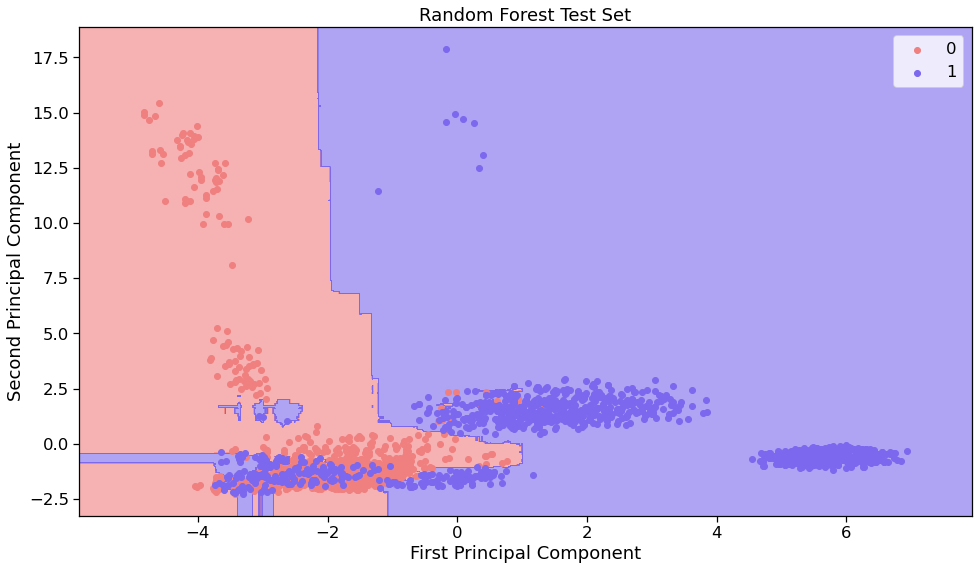

In [79]:
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,9))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Random Forest Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

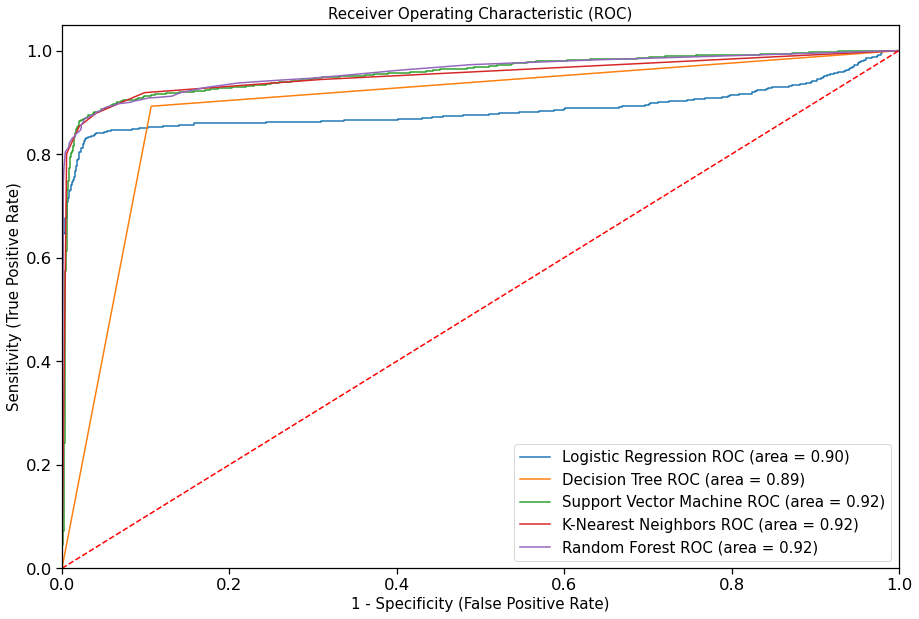

In [86]:
plt.figure(figsize=(10,10))
models = [
{
    'label': 'Logistic Regression',
    'model': lr,
},
{
    'label': 'Decision Tree',
    'model': dt,
},
{
    'label': 'Support Vector Machine',
    'model': svm,
},
{
    'label': 'K-Nearest Neighbors',
    'model': knn,
},
{
    'label': 'Random Forest',
    'model': rf,
}
]

for m in models:
    model = m['model'] 
    model.fit(X_train_pca, y_train) 
    y_pred=model.predict(X_test_pca) 
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_pca)[:,1])
    auc = roc_auc_score(y_test,model.predict(X_test_pca))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.show()

Como tenemos varios modelos creados para clasificar a los hongos podemos aprovechar esto para juntarlos y creat un Clasificador de votacion `VotingClassifier`: Para el clasificador usaremos una votacion dura

In [104]:
from sklearn.ensemble import VotingClassifier
from itertools import product
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec


In [113]:
yy = y_train.to_numpy()

In [133]:
eclf = VotingClassifier(estimators=[("lr", lr), ("rf", rf), ("svc", svm),("dt", dt),("kn", knn)],voting="soft")

eclf.fit(X_train_pca,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=50,
                                                     random_state=42)),
                             ('svc',
                              SVC(gamma='auto', probability=True,
                                  random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=42)),
                             ('kn', KNeighborsClassifier())],
                 voting='soft')

Miremos la precicion de cada clasificador en el conjunto de prueba

In [134]:
from sklearn.metrics import accuracy_score
for clf in (lr,rf,svm,dt,knn,eclf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 1.0
RandomForestClassifier 1.0
SVC 1.0
DecisionTreeClassifier 1.0
KNeighborsClassifier 0.9995898277276456
VotingClassifier 1.0


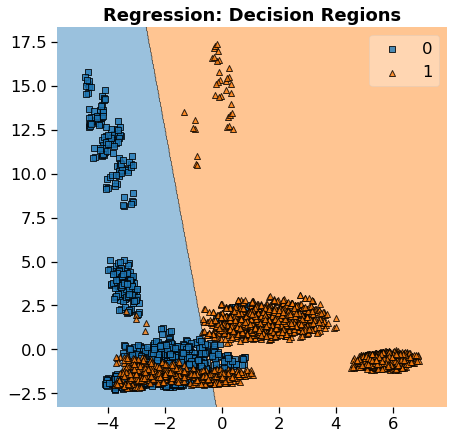

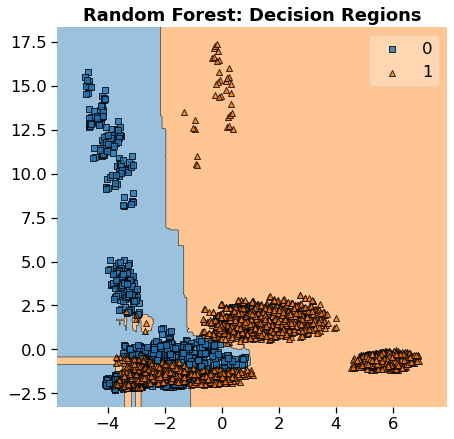

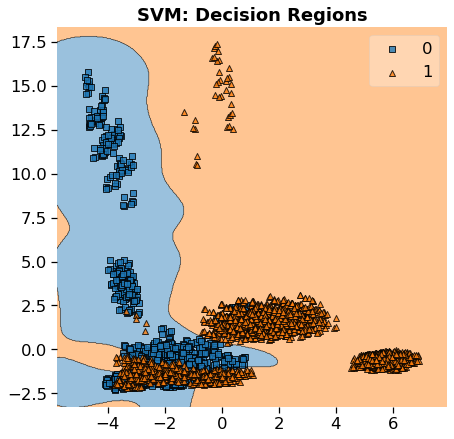

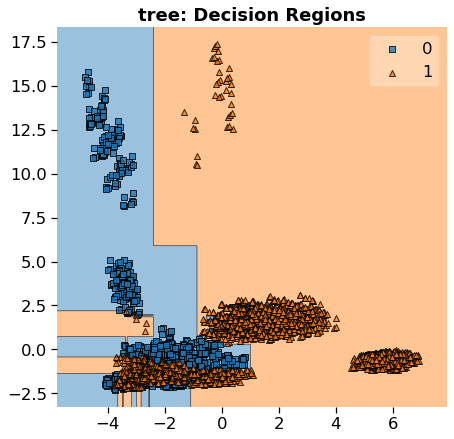

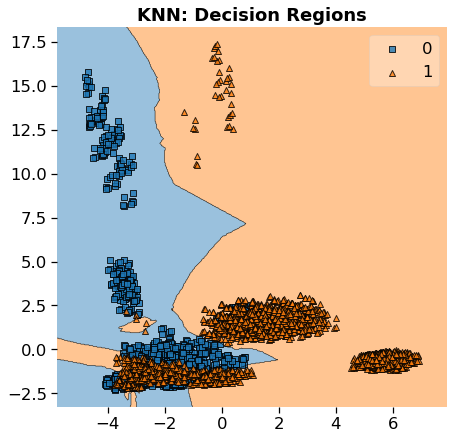

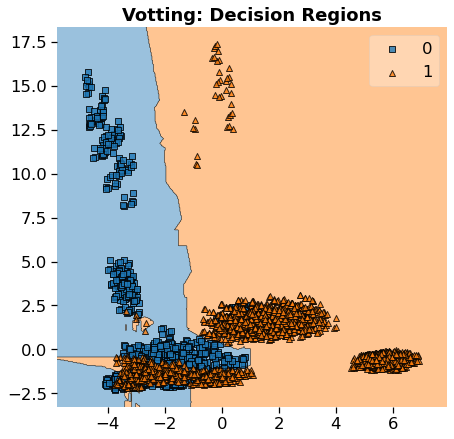

In [131]:
labels = ['Regression', 'Random Forest', 'SVM', 'tree','KNN','Votting']
for clf, lab in zip([lr, rf, svm,dt,knn,eclf],
                         labels):
    plt.figure(figsize= (7,7))
    clf.fit(X_train_pca, yy)
    plot_decision_regions(X=X_train_pca, y=yy, clf=clf)
    plt.title('{}: Decision Regions'.format(lab),fontweight='bold')
    plt.show()

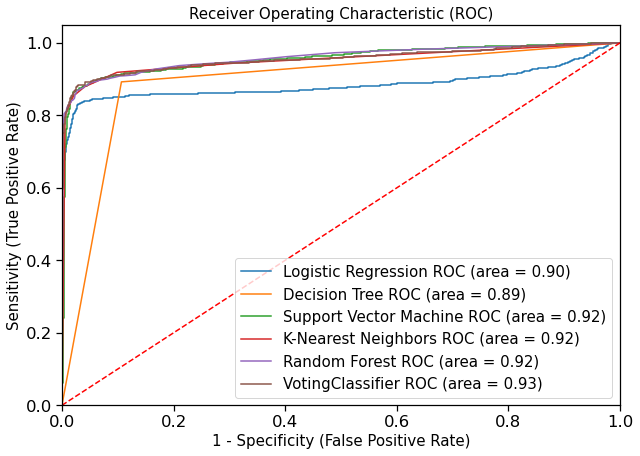

In [136]:
plt.figure(figsize=(10,7))
models = [
{
    'label': 'Logistic Regression',
    'model': lr,
},
{
    'label': 'Decision Tree',
    'model': dt,
},
{
    'label': 'Support Vector Machine',
    'model': svm,
},
{
    'label': 'K-Nearest Neighbors',
    'model': knn,
},
{
    'label': 'Random Forest',
    'model': rf,
},
{
    'label': 'VotingClassifier',
    'model': eclf,
}
]

for m in models:
    model = m['model'] 
    model.fit(X_train_pca, y_train) 
    y_pred=model.predict(X_test_pca) 
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_pca)[:,1])
    auc = roc_auc_score(y_test,model.predict(X_test_pca))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=15)
plt.show()